# Dataset



For simplicity we use the Wine dataset from sklearn (UCI).

Features:
- alcohol
- malic_acid
- ash
- alcalinity_of_ash
- magnesium
- total_phenols
- flavanoids
- nonflavanoid_phenols
- proanthocyanins
- color_intensity
- hue
- od280od315_of_diluted_wines'
- proline

Labels: Wine classes

In [ ]:
from sklearn.datasets import load_wine
import numpy as np

data = load_wine()
features = data["data"]
labels = data["target"]
features.shape

(178, 13)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
try:
  import ipyvolume as ipv
except:
  !pip install ipyvolume -q
  import ipyvolume as ipv
  !jupyter nbextension enable --py --sys-prefix ipyvolume

def visualize_2d(x, labels):
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=labels, s=100, alpha=0.8,
                    palette="Greens", edgecolor="black")

def visualize_3d(x, labels):
    # Workaround as axis limits are not auto-scaling
    x_norm = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
    fig = ipv.figure(height=400, width=400)
    x, y, z = x_norm[:, 0], x_norm[:, 1], x_norm[:, 2]

    # Colors
    cmap = plt.get_cmap('Greens', 3)
    color = cmap(labels)
    ipv.scatter(x, y, z, size=4, marker="sphere", color=color)
    ipv.show()

# PCA

In [ ]:
# It's also possible to manually compute eigenvectors and eigenvalues
subset_idx = 3
cov = np.cov(features)[:subset_idx, :subset_idx]
eig_vals, eig_vecs = np.linalg.eig(cov)
print("Eigenvalues: \n", eig_vals)
print("Eigenvectors: \n", eig_vecs)

Eigenvalues: 
 [2.75887696e+05 5.66833522e+01 1.34732230e+00]
Eigenvectors: 
 [[-0.55810925 -0.78959847  0.25504573]
 [-0.55046096  0.12232505 -0.82585066]
 [-0.62089193  0.60130761  0.50291387]]


2D Projection

CPU times: user 2.45 ms, sys: 160 µs, total: 2.61 ms
Wall time: 2.74 ms


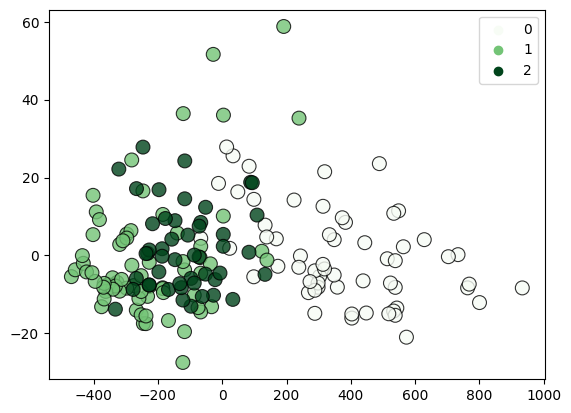

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
%time pca_2d = pca.fit_transform(features)
visualize_2d(x=pca_2d, labels=labels)

In [ ]:
print("Eigenvalues: \n", pca.explained_variance_ratio_)
print("Eigenvectors: \n", pca.components_)


Eigenvalues: 
 [0.99809123 0.00173592]
Eigenvectors: 
 [[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]
 [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
   9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
   5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
  -1.77738095e-02]]


3D Projection

In [ ]:
pca = PCA(n_components=3)
%time pca_3d = pca.fit_transform(features)
visualize_3d(pca_3d, labels)

CPU times: user 1.42 ms, sys: 50 µs, total: 1.47 ms
Wall time: 1.49 ms


Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…